<a href="https://colab.research.google.com/github/ThorugoBR/Alura_Bootcamp_Dados/blob/main/Imers%C3%A3o_Dados4_Pesquisa_de_imoveis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootcamp Imersão dados 4 ed.
##Aula 1 
Alura


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [2]:
#Standard visualization plot
def Std_Vis_Plot():
    fig, ax = plt.subplots(figsize=(6,3),dpi=650)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which='minor', color='black',alpha=0.15, linestyle='--')
    ax.grid(which='major', color='black',alpha=0.33, linestyle='--');

In [3]:

url= "https://gist.githubusercontent.com/ThorugoBR/bec9bb72cc4dec569aaa9416b70bc7e8/raw/e032acfc91611519efd5801c0cfcb8df8f131946/dados_imoveis_notmain.csv"
df=pd.read_csv(url)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
df['Bairro'][6522]

'Vila Paulo Silas'

In [5]:
df.sample(15)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8015,NaN,Consolação,São Paulo,850,9,8,25,R$ 28.000\n /Mês
9493,NaN,Cidade Antônio Estevão de Carvalho,São Paulo,55,2,1,1,R$ 320.000
6503,Rua São Benedito,Santo Amaro,São Paulo,372,5,3,10,R$ 10.000.000
790,Rua Doutor João Dalmácio Azevedo,Cidade Jardim,São Paulo,1105,4,5,14,R$ 14.000.000
3336,NaN,Jardim Everest,São Paulo,500,4,8,6,R$ 20.000\n /Mês
2816,"Rua Filipe de Gusmão, 158",Sumarezinho,São Paulo,120,3,3,1,R$ 905.000
2811,"Rua Feliciano Maia, 50",Jardim Paulista,São Paulo,560,5,5,6,R$ 40.000\n /Mês
3671,NaN,Vila Nova Conceição,São Paulo,215,3,2,4,R$ 5.250.000
8592,"Rua José Vicente, 194",Tremembé,São Paulo,455,4,3,8,R$ 1.600.000
1533,Rua Ipacaraí,Pompeia,São Paulo,180,3,4,2,R$ 1.380.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [7]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [8]:
df["Metragem"].mean()

442.30065947242207

In [9]:
df[df['Bairro']=='Vila Mariana']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [10]:
round(df['Bairro'].value_counts().min(),0)

1

Text(0.5, 1.0, 'Número de casas separados por bairros (só 10 maiores counts)')

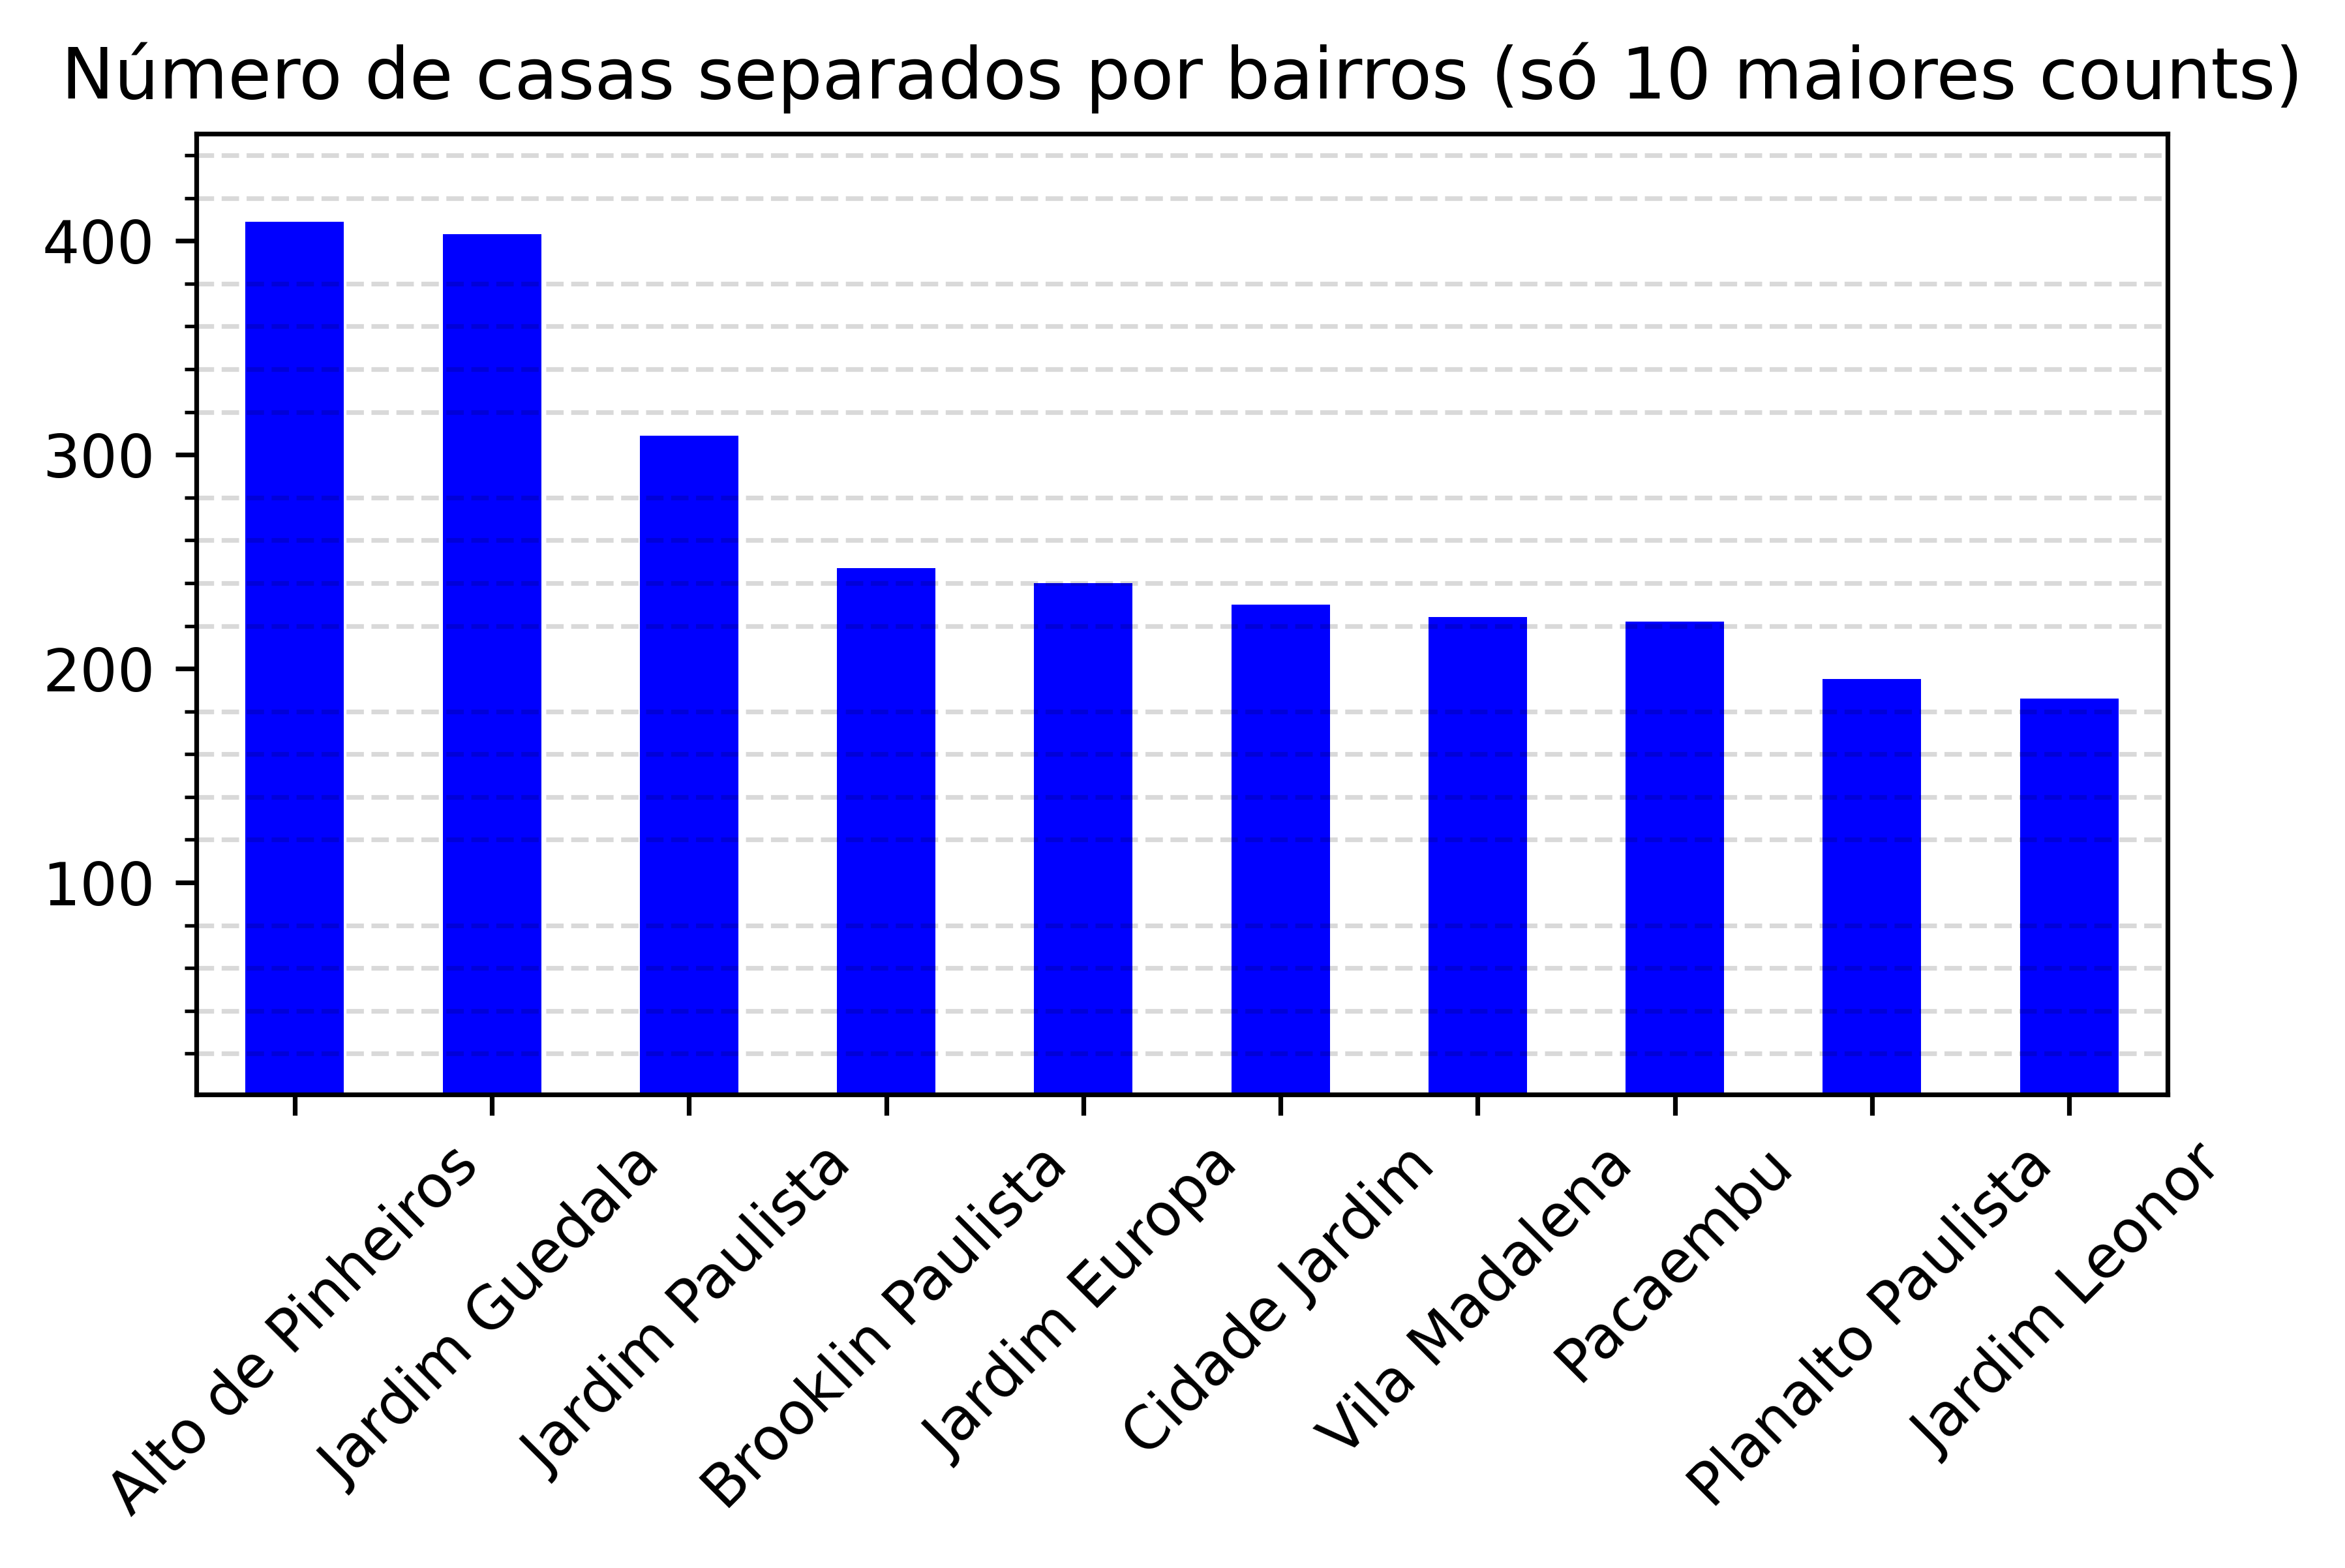

In [11]:
Std_Vis_Plot()
df['Bairro'].value_counts().head(10).plot.bar(color='blue',ylim=(round(df['Bairro'].value_counts().min(),0),round(df['Bairro'].value_counts().max()*1.1,0)))
plt.xticks(rotation=45)
plt.title("Número de casas separados por bairros (só 10 maiores counts)")

## Desafios 🦄:
1.   Realizar a média da metragem para cada um dos bairros
2.   2 Formas de selecionar os dados por Bairro (consultar docum.)
3.   Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar algumas conclusões
4. Outros dados estatísticos como Média, mediana, min ,max
5. Descobrir quais bairros não possuem o endereço do imóvel 



#1 Média por bairro

In [12]:
media_metragem_agrupado=df.groupby(['Bairro']).mean()['Metragem']
media_metragem_agrupado

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

#3 Gráficos para demais colunas

In [13]:
df.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor'],
      dtype='object')

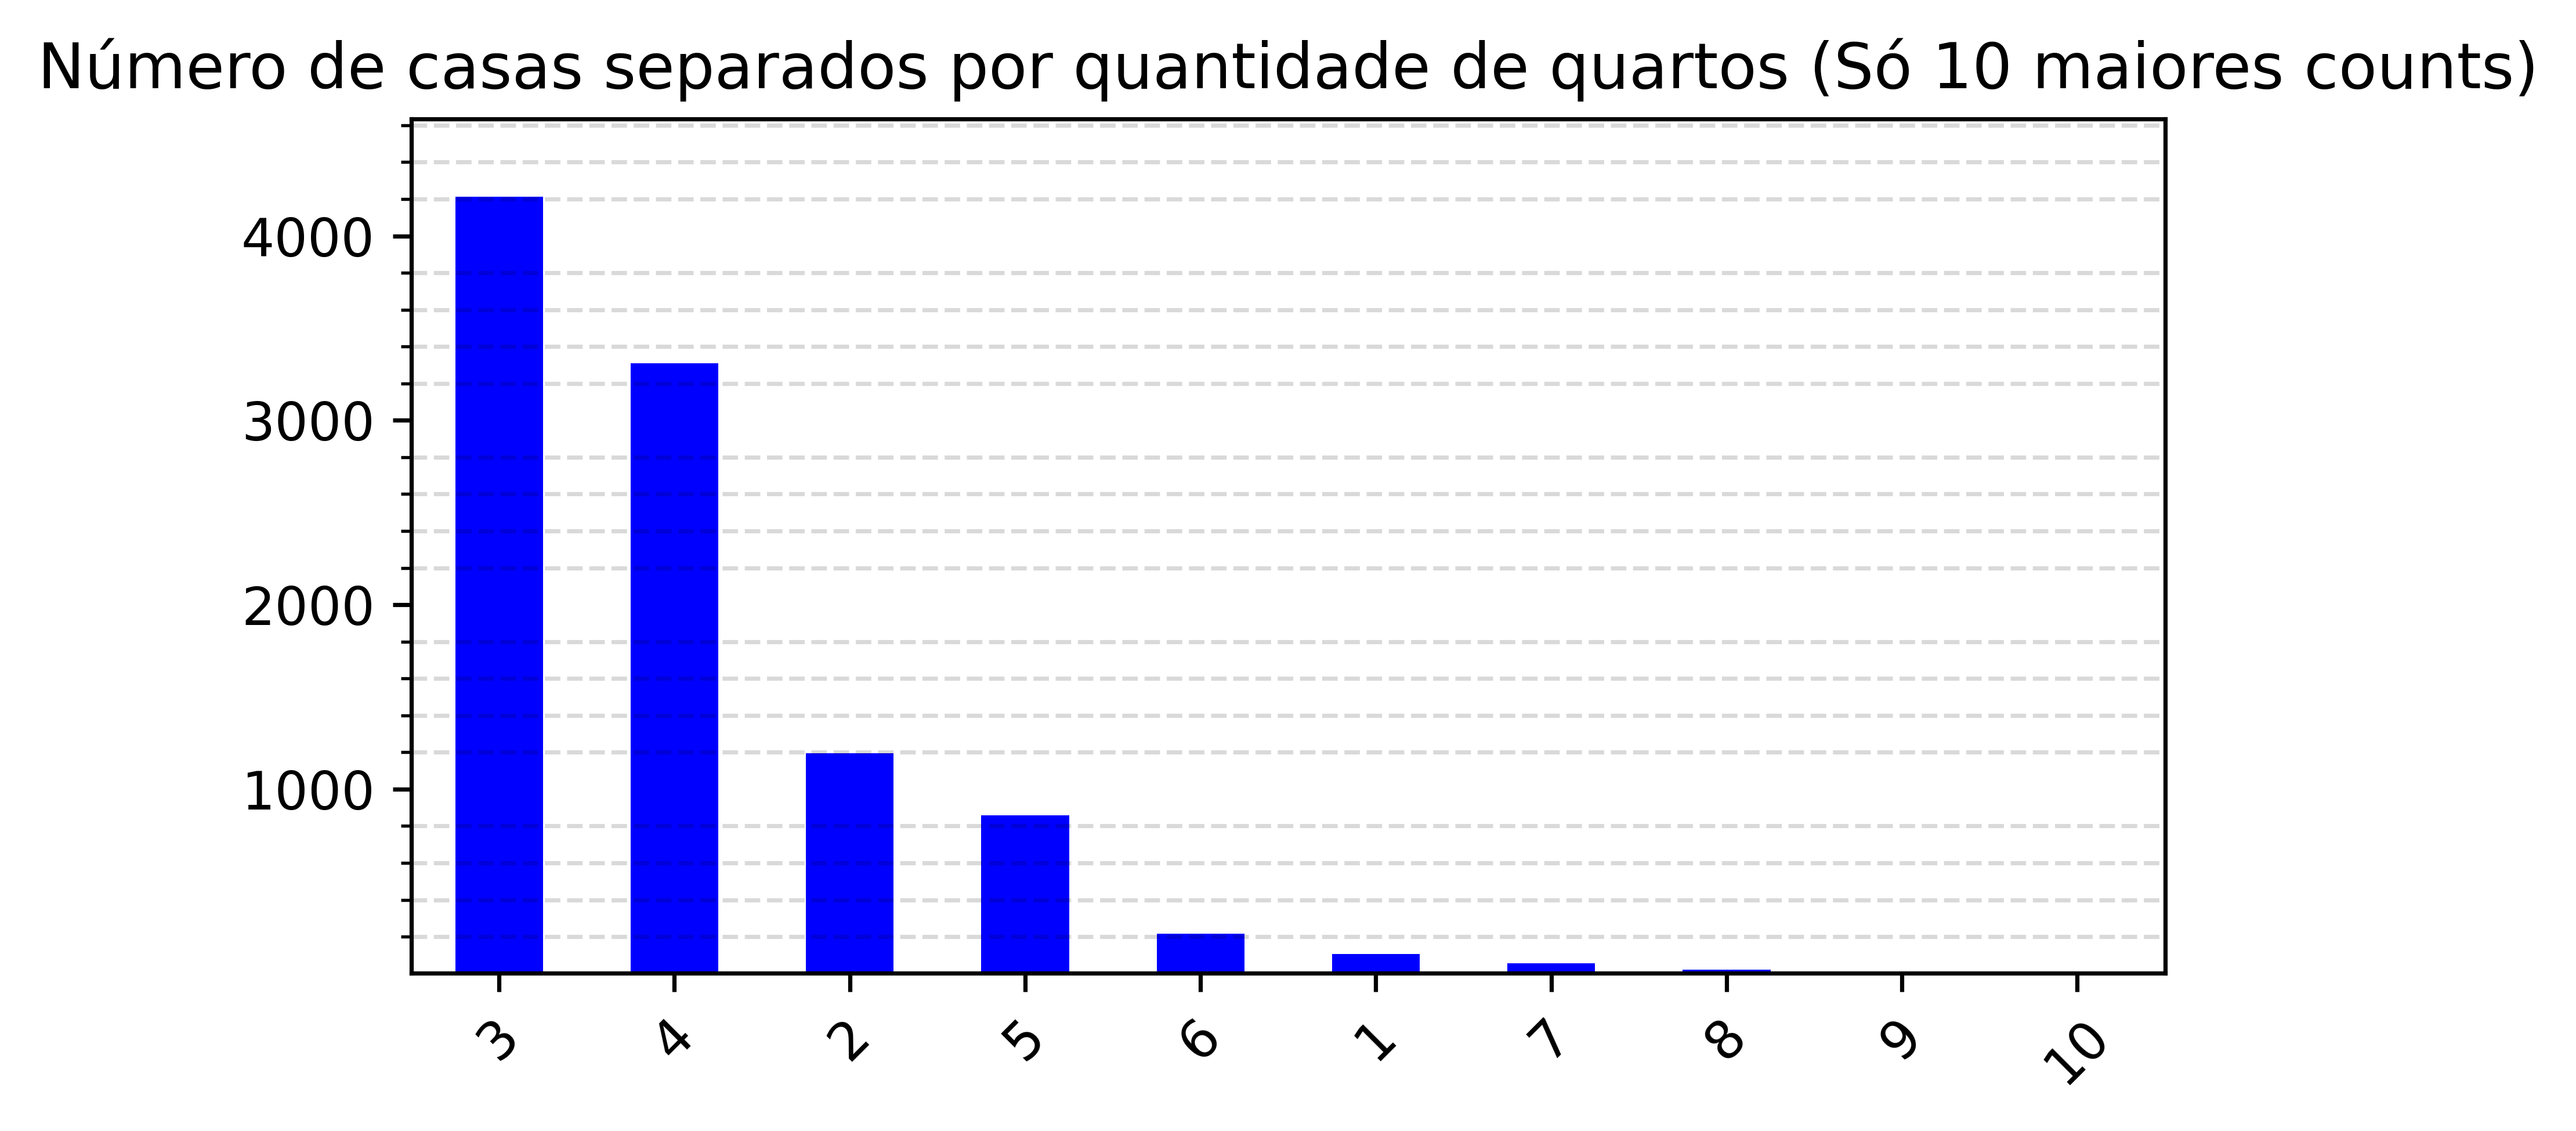

In [14]:
Std_Vis_Plot()
df['Quartos'].value_counts().head(10).plot.bar(color='blue',ylim=(round(df['Quartos'].value_counts().min(),0),round(df['Quartos'].value_counts().max()*1.1,0)))
plt.xticks(rotation=45)
plt.title("Número de casas separados por quantidade de quartos (Só 10 maiores counts)");

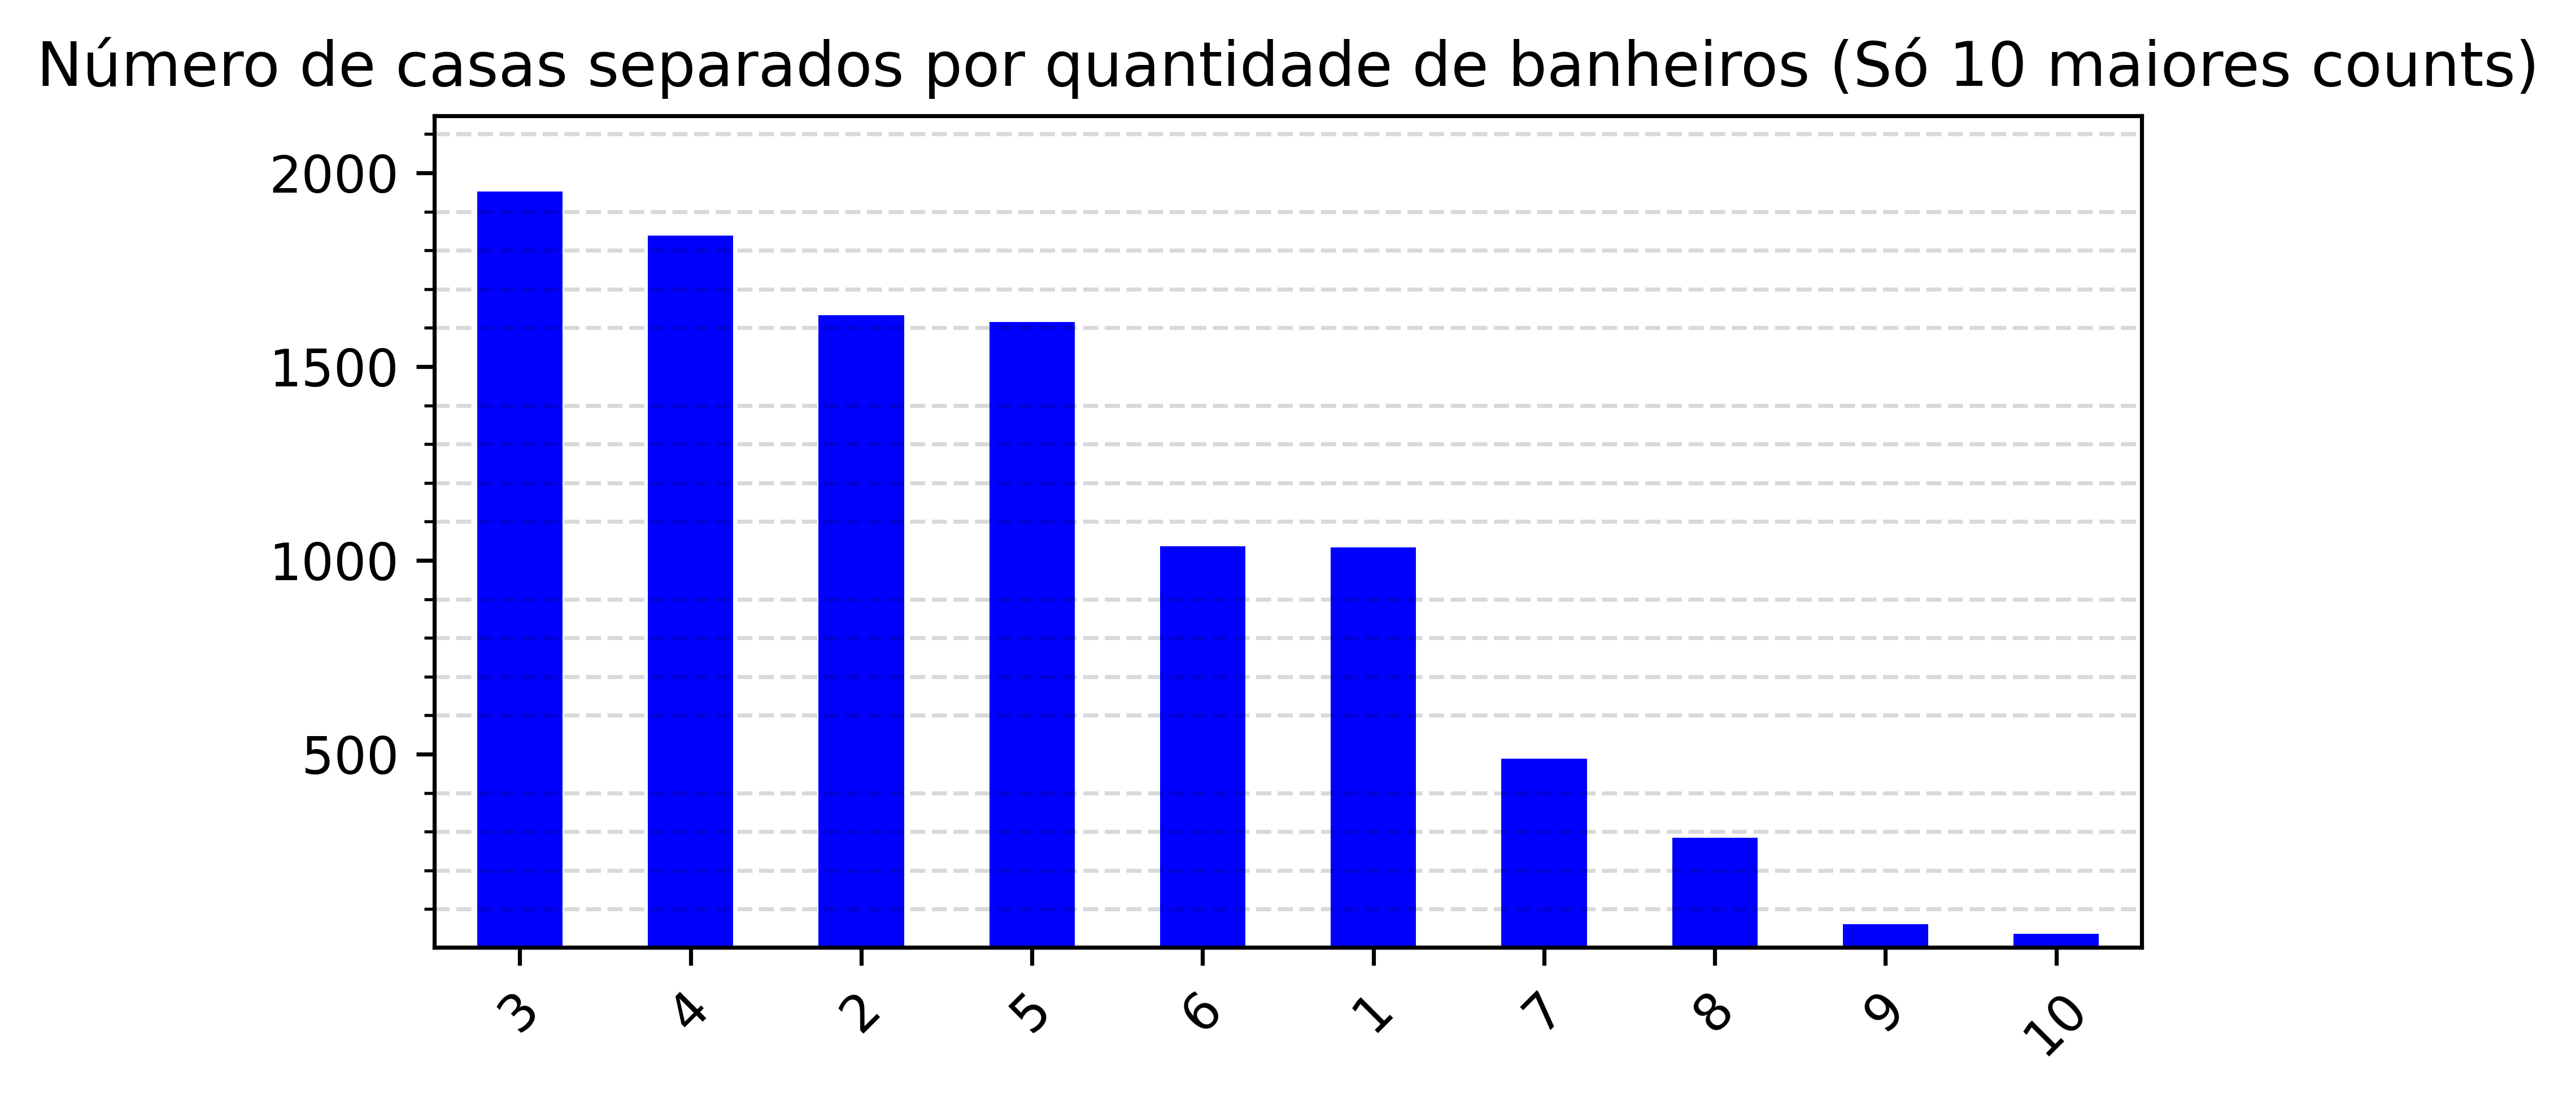

In [15]:
Std_Vis_Plot()
df['Banheiros'].value_counts().head(10).plot.bar(color='blue',ylim=(round(df['Banheiros'].value_counts().min(),0),round(df['Banheiros'].value_counts().max()*1.1,0)))
plt.xticks(rotation=45)
plt.title("Número de casas separados por quantidade de banheiros (Só 10 maiores counts)");

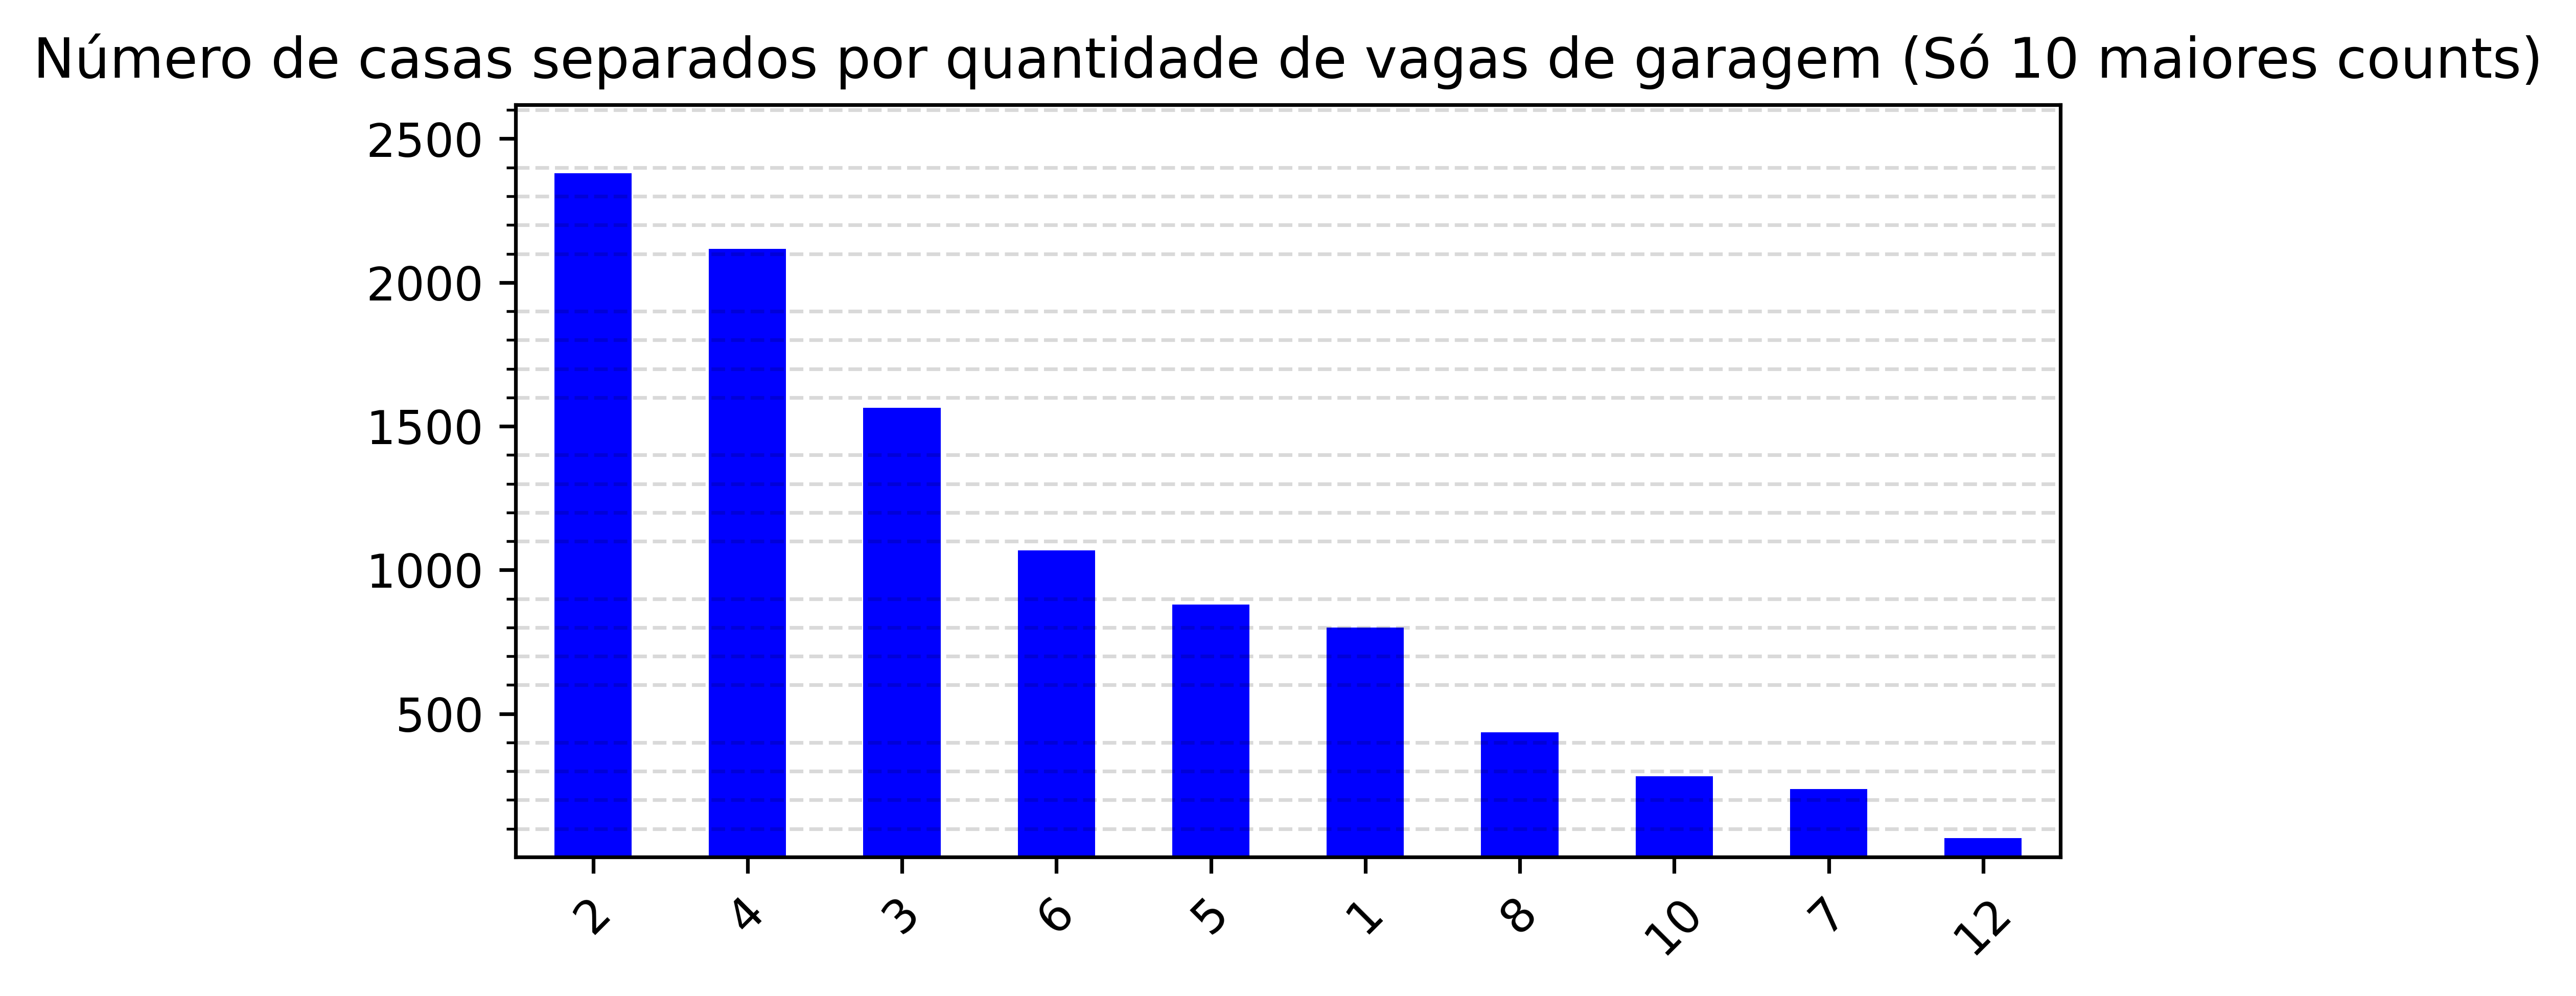

In [16]:
Std_Vis_Plot()
df['Vagas'].value_counts().head(10).plot.bar(color='blue',ylim=(round(df['Vagas'].value_counts().min(),0),round(df['Vagas'].value_counts().max()*1.1,0)))
plt.xticks(rotation=45)
plt.title("Número de casas separados por quantidade de vagas de garagem (Só 10 maiores counts)");

#4 Dados Estatísticos
Outros dados estatísticos como Média, mediana, min ,max

In [17]:
mean_agrupado_bairro=df.groupby(['Bairro']).mean()
mean_agrupado_bairro

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,253.056818,3.318182,3.079545,2.909091
Alto da Boa Vista,418.875000,4.125000,5.125000,4.625000
Alto da Lapa,294.337209,3.151163,3.790698,3.906977
Alto da Mooca,270.050000,3.300000,2.600000,3.650000
Alto de Pinheiros,433.444988,3.938875,4.838631,5.004890
...,...,...,...,...
Vila Água Funda,152.200000,2.600000,2.200000,2.600000
Água Branca,191.000000,3.153846,3.076923,2.461538
Água Fria,165.416667,2.833333,3.416667,2.500000


In [18]:
median_agrupado_bairro=df.groupby(['Bairro']).median()
median_agrupado_bairro

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,227.5,3.0,3.0,3.0
Alto da Boa Vista,378.0,4.0,5.5,4.0
Alto da Lapa,255.0,3.0,4.0,4.0
Alto da Mooca,182.5,3.0,2.0,4.0
Alto de Pinheiros,412.0,4.0,5.0,4.0
...,...,...,...,...
Vila Água Funda,143.0,2.0,2.0,2.0
Água Branca,174.0,3.0,3.0,2.0
Água Fria,174.5,3.0,4.0,2.0


In [19]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


#5 Descobrir quais bairros não possuem o endereço do imóvel 


In [20]:
df[df['Rua'].isna()]['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

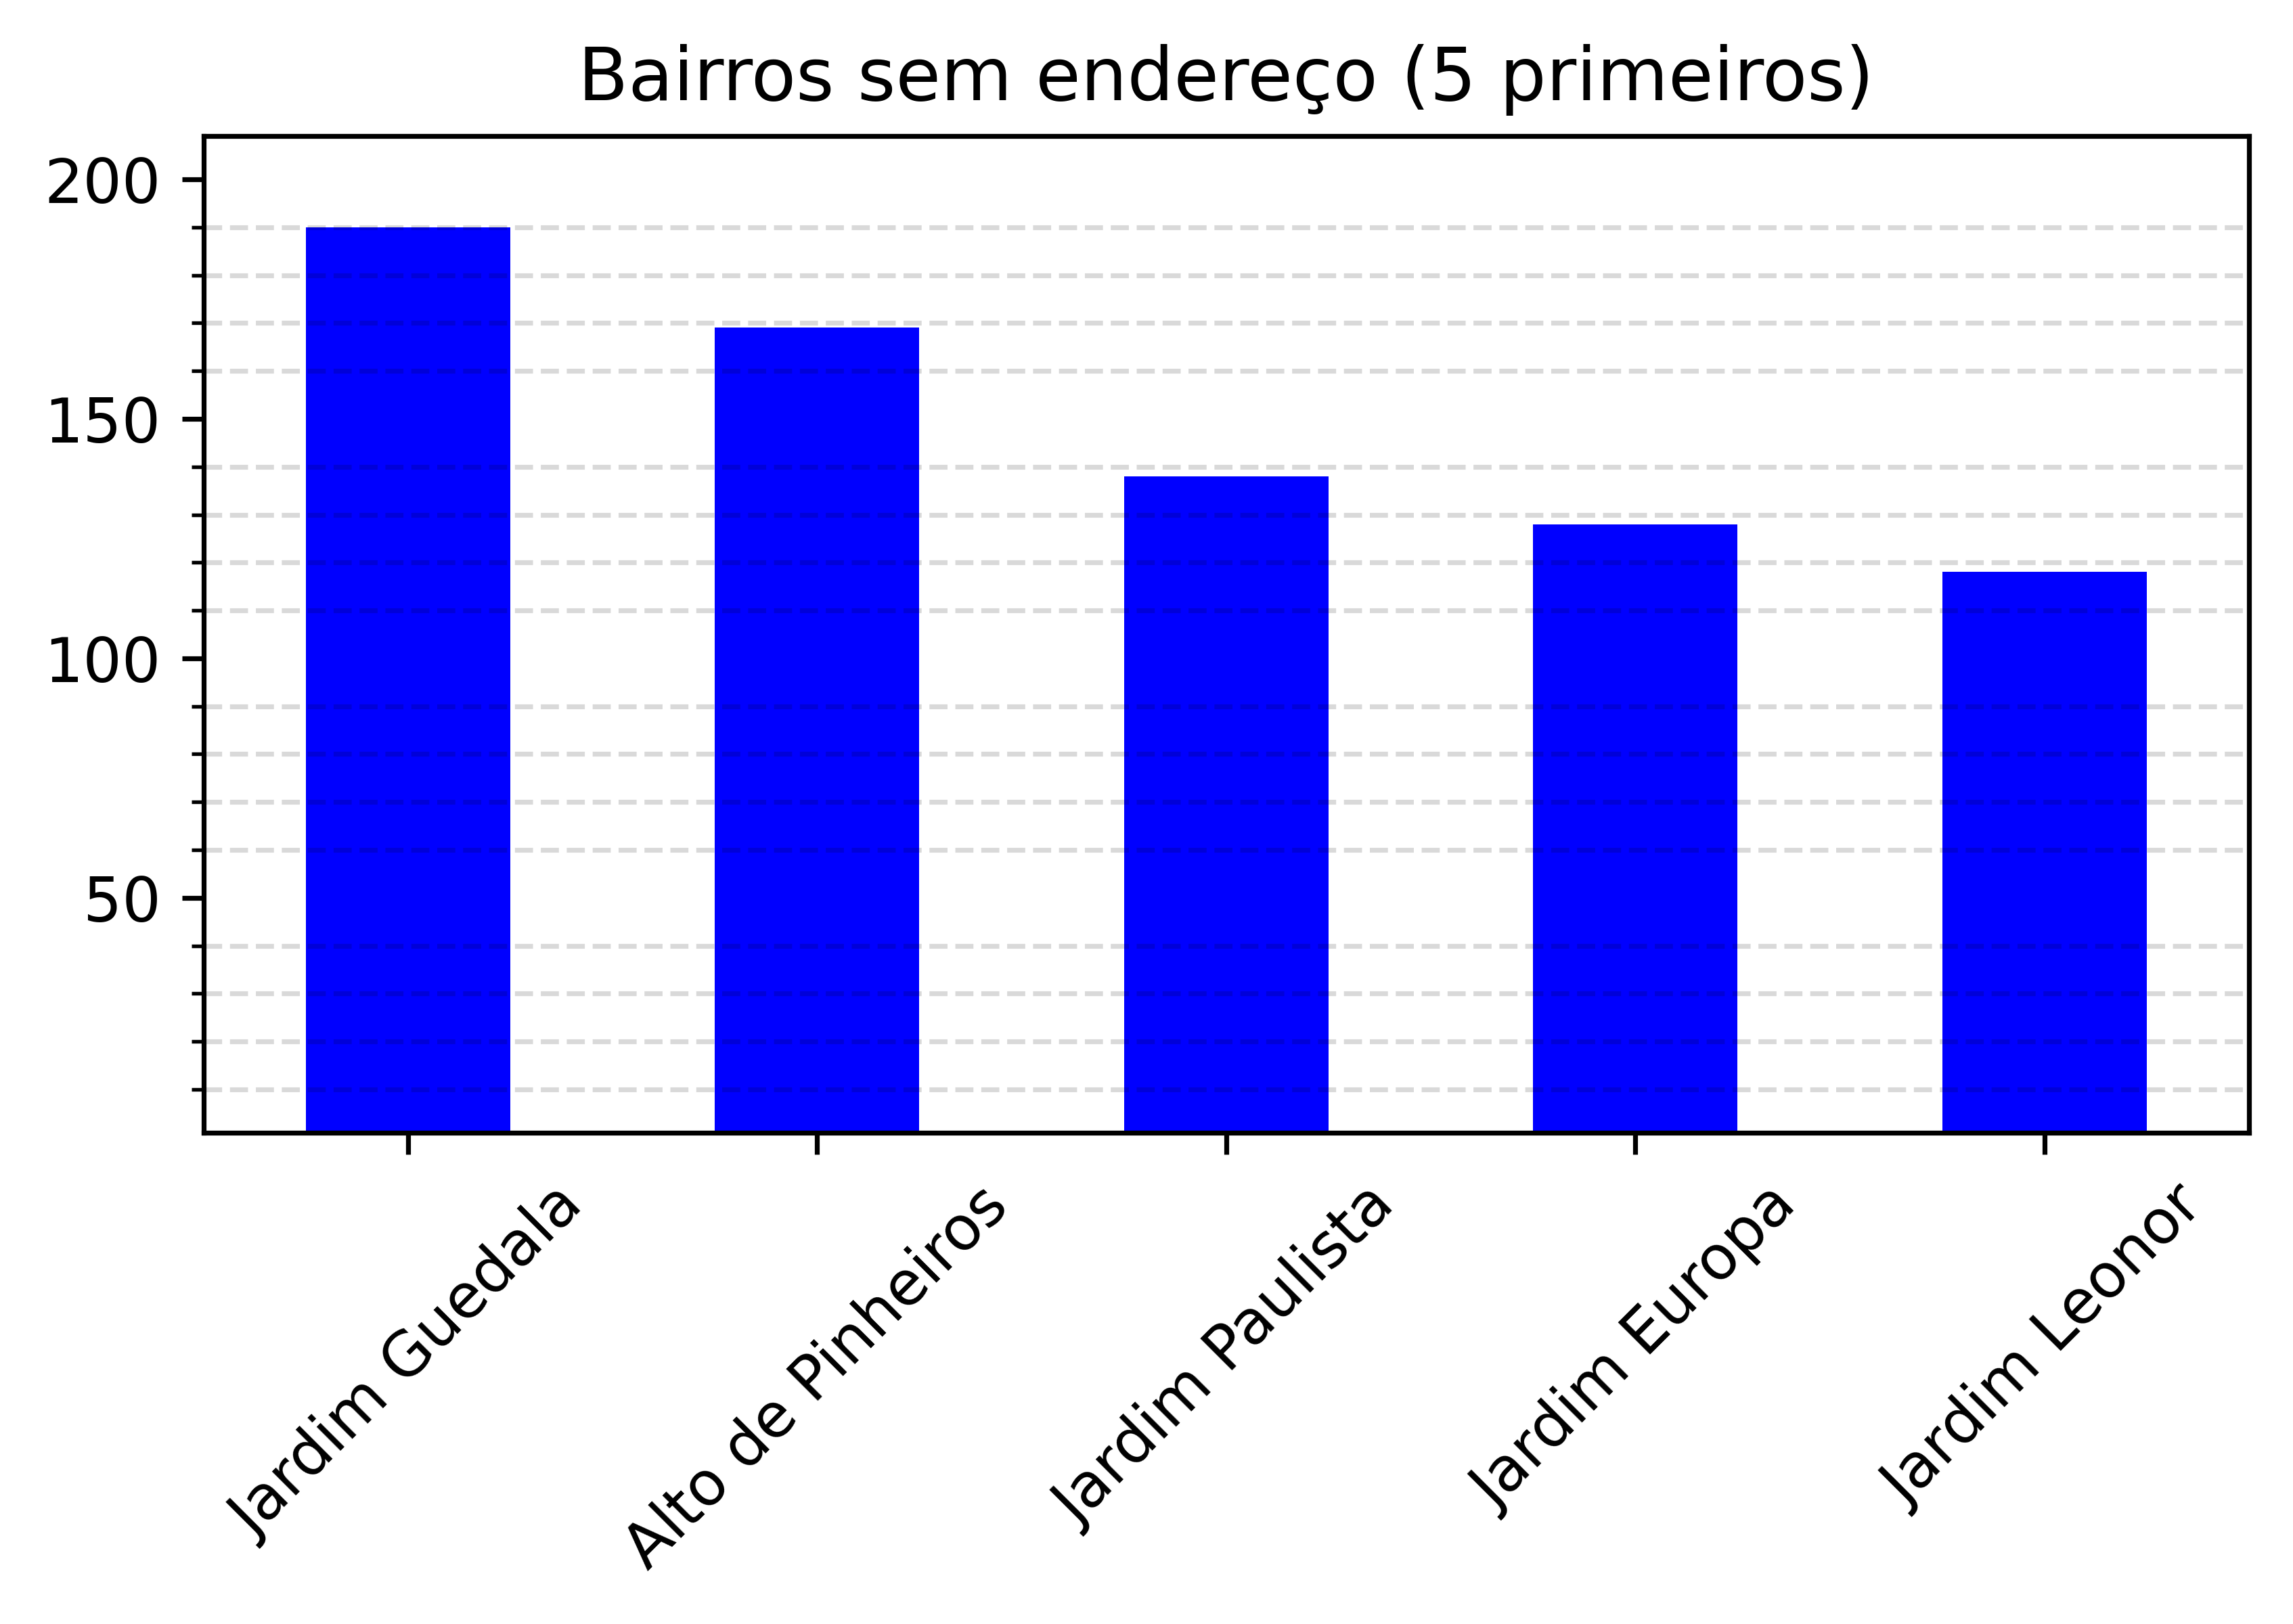

In [21]:
Std_Vis_Plot()
df[df['Rua'].isna()]['Bairro'].value_counts().head(5).plot.bar(color='blue',ylim=(round(df[df['Rua'].isna()]['Bairro'].value_counts().min(),0),round(df[df['Rua'].isna()]['Bairro'].value_counts().max()*1.1,0)))
plt.xticks(rotation=45)
plt.title("Bairros sem endereço (5 primeiros)");

In [22]:
df_teste=df[df['Bairro']=='Jardim Guedala']
df_teste[df_teste['Rua'].isna()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
88,NaN,Jardim Guedala,São Paulo,650,4,7,4,R$ 3.500.000
99,NaN,Jardim Guedala,São Paulo,354,4,6,4,R$ 2.950.000
177,NaN,Jardim Guedala,São Paulo,420,3,6,5,R$ 3.500.000
188,NaN,Jardim Guedala,São Paulo,431,4,5,5,R$ 30.000\n /Mês
...,...,...,...,...,...,...,...,...
8600,NaN,Jardim Guedala,São Paulo,788,5,6,8,R$ 7.500.000
8639,NaN,Jardim Guedala,São Paulo,430,4,4,4,R$ 3.800.000
8853,NaN,Jardim Guedala,São Paulo,405,4,6,5,R$ 1.700.000
8977,NaN,Jardim Guedala,São Paulo,405,4,6,5,R$ 1.700.000


#Respostas
## Desafios 🦄:
1.   Realizar a média da metragem para cada um dos bairros
2.   2 Formas de selecionar os dados por Bairro (consultar docum.)
3.   Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar algumas conclusões
4. Outros dados estatísticos como Média, mediana, min ,max
5. Descobrir quais bairros não possuem o endereço do imóvel 

#Aula 2

In [23]:
df['Valor'].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [24]:
df['Valor'].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [25]:
df['Valor'].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [26]:
df[['Moeda','Preço','Tipo_Anuncio']]=df['Valor'].str.split(expand=True)

In [27]:
df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês


In [28]:
df[df['Tipo_Anuncio'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [29]:
sell_df =df[df['Tipo_Anuncio'].isnull()]

In [30]:
sell_df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [31]:
sell_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rua           6107 non-null   object
 1   Bairro        9146 non-null   object
 2   Cidade        9156 non-null   object
 3   Metragem      9156 non-null   int64 
 4   Quartos       9156 non-null   int64 
 5   Banheiros     9156 non-null   int64 
 6   Vagas         9156 non-null   int64 
 7   Valor         9156 non-null   object
 8   Moeda         9156 non-null   object
 9   Preço         9156 non-null   object
 10  Tipo_Anuncio  0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [32]:
sell_df['Preço'].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Preço, Length: 9156, dtype: float64

In [33]:
sell_df['Preço']=sell_df['Preço'].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
sell_df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.0,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.0,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.0,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.0,None


In [35]:
sell_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rua           6107 non-null   object 
 1   Bairro        9146 non-null   object 
 2   Cidade        9156 non-null   object 
 3   Metragem      9156 non-null   int64  
 4   Quartos       9156 non-null   int64  
 5   Banheiros     9156 non-null   int64  
 6   Vagas         9156 non-null   int64  
 7   Valor         9156 non-null   object 
 8   Moeda         9156 non-null   object 
 9   Preço         9156 non-null   float64
 10  Tipo_Anuncio  0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


In [36]:
media_preço_agrupado=sell_df.groupby(['Bairro']).mean()['Preço'].sort_values(ascending=False)
media_preço_agrupado

Bairro
Jardim América         1.642760e+07
Jardim Teresa          1.483667e+07
Chácara Flora          1.350000e+07
Retiro Morumbi         1.200261e+07
Jardim Europa          1.149606e+07
                           ...     
Jardim São José        2.138500e+05
Jardim Benfica         1.999000e+05
Jardim Morais Prado    1.800000e+05
Vila Cardoso Franco    1.800000e+05
Vila Aurea             1.650000e+05
Name: Preço, Length: 697, dtype: float64

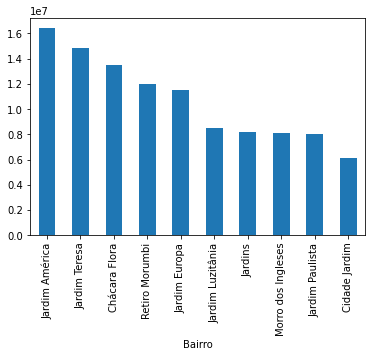

In [37]:
media_preço_agrupado.head(10).plot.bar()

In [38]:
pd.set_option('display.precision',3)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
sell_df.describe(include = 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_Anuncio
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156.00,0
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,NaN,0
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,3052202.96,NaN
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,3944208.19,NaN
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,13000.00,NaN
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,890000.00,NaN
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,1800000.00,NaN
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,3500000.00,NaN


#Desafio Aula 2 🦄:
1.   Criar escala de valores em Milhões
2. Deixar o gráfico do Histograma com o eixo X contendo os valores em Milhoes, alterar de tal maneira que fique super legível
3. Preço do metro quadrado por bairro
4. Gráfico de distribuição com o preço do metro quadrado por bairro





(-100.0, 10000000.0)

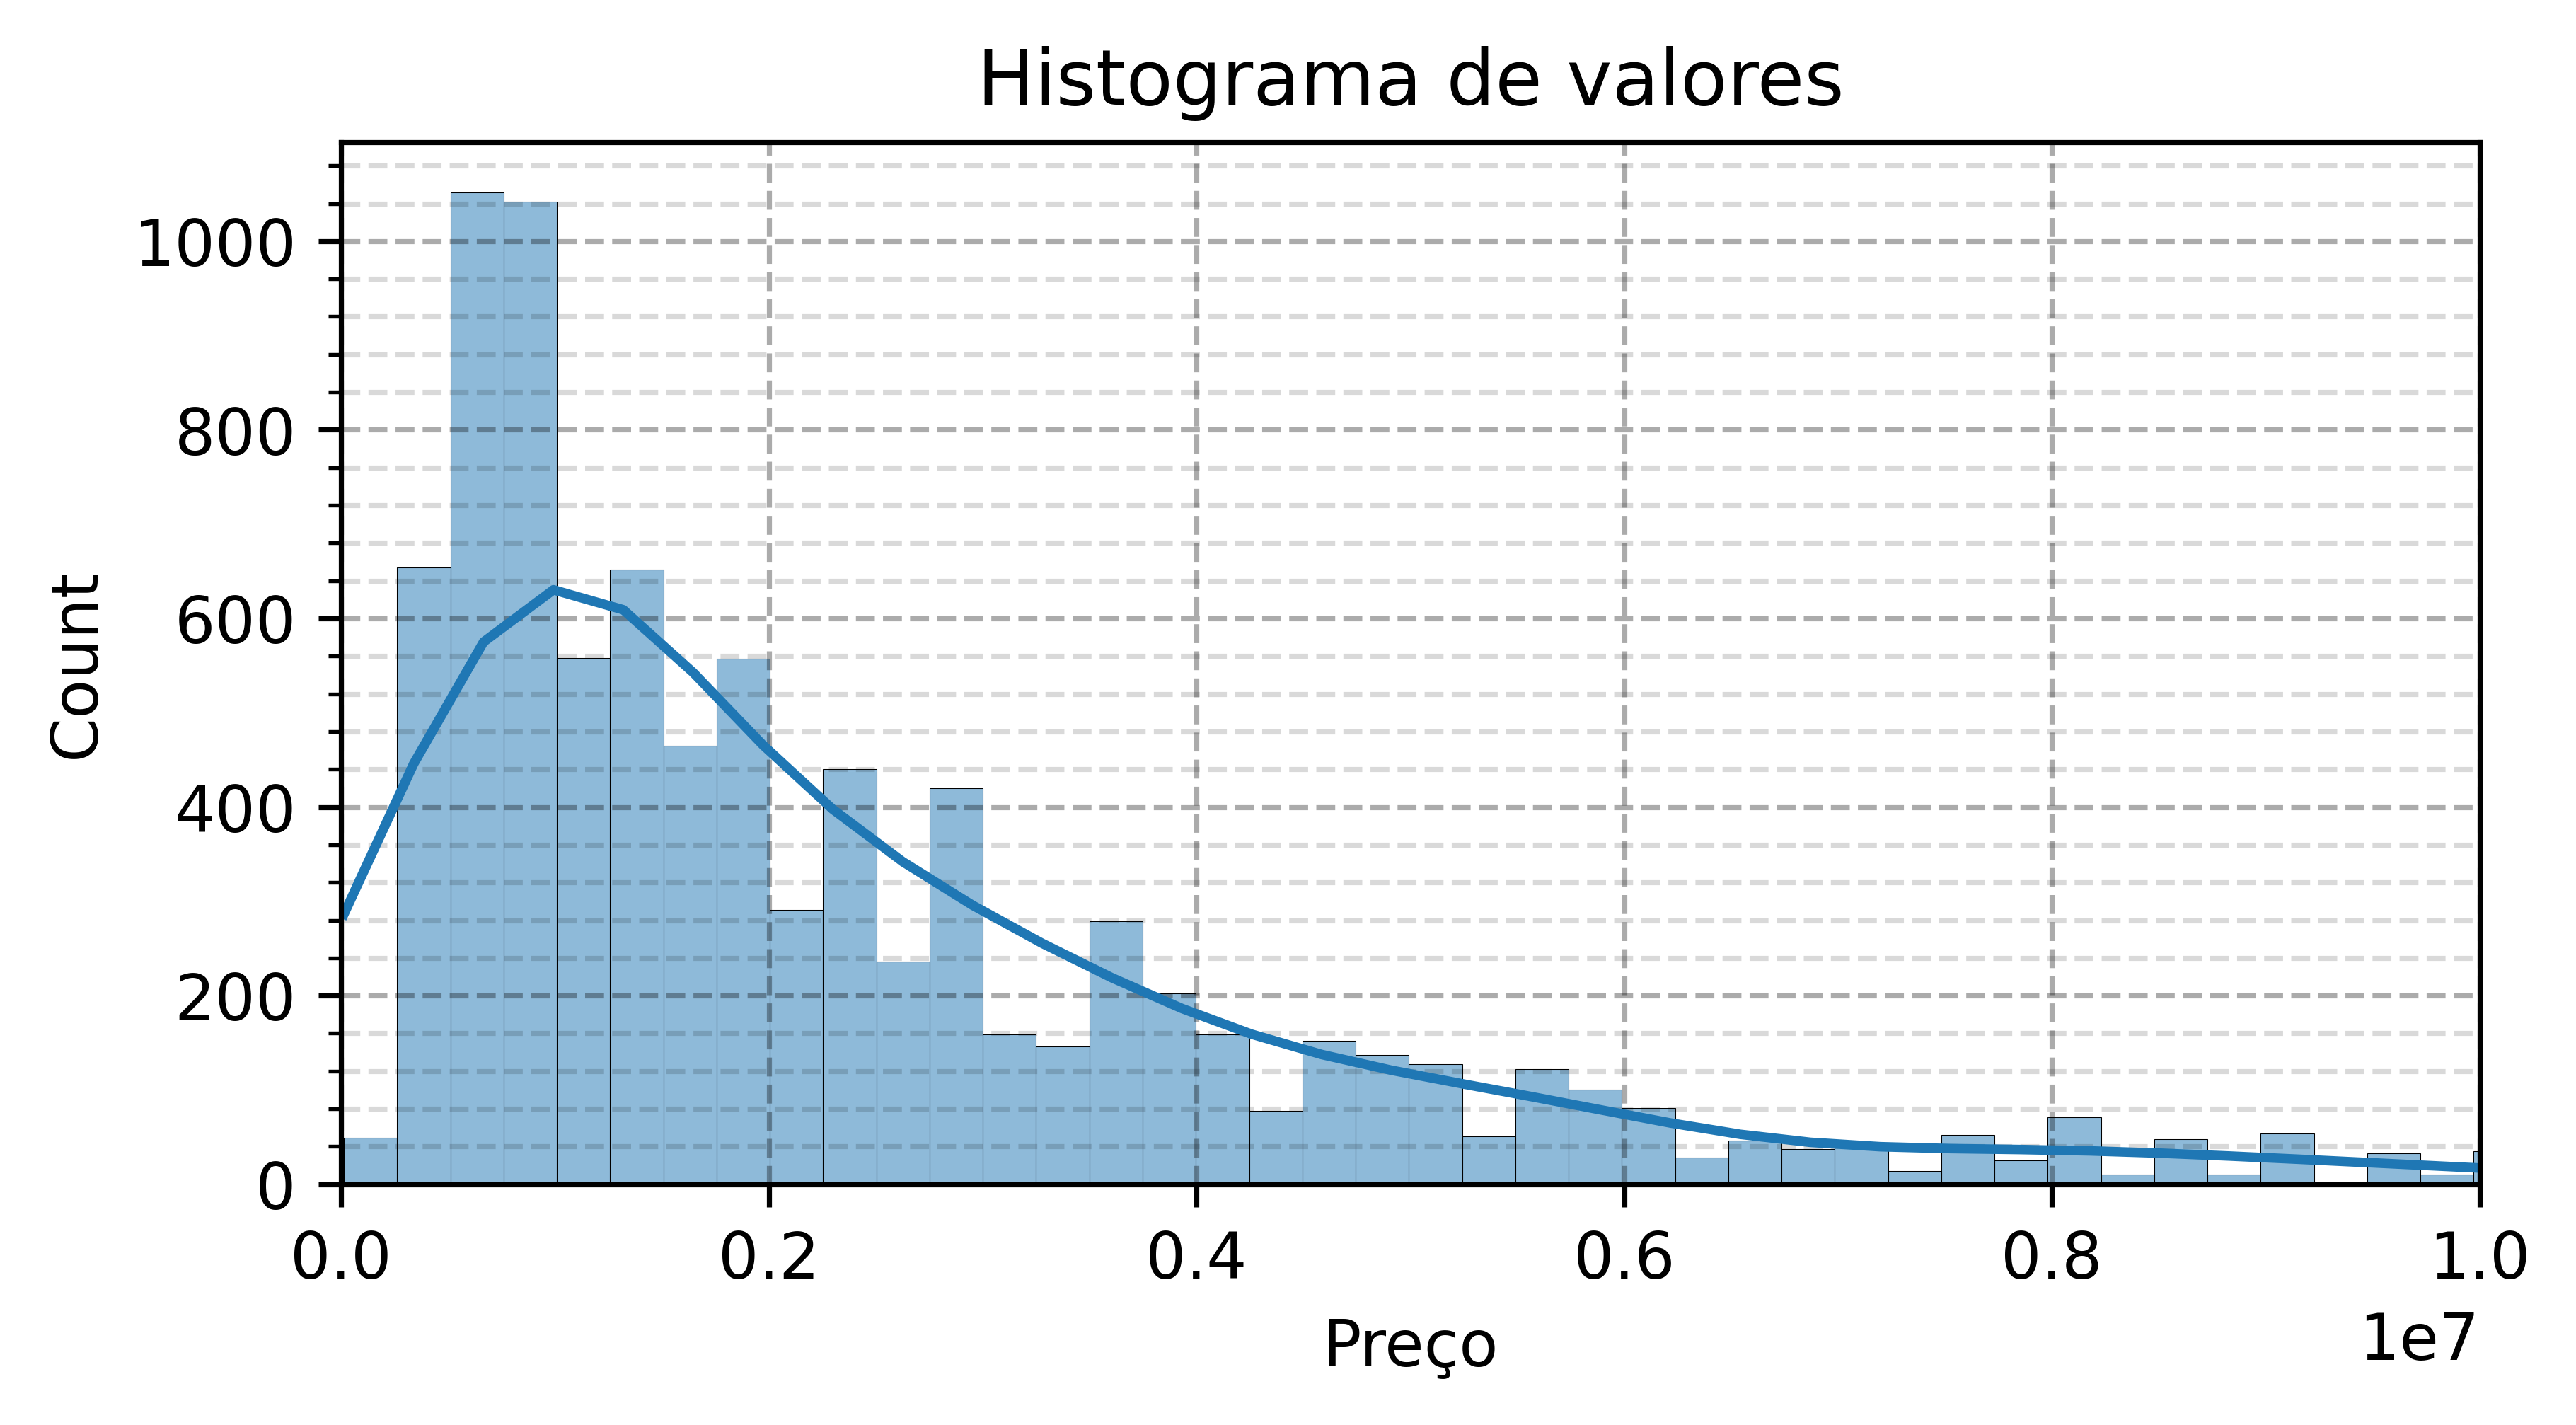

In [45]:
Std_Vis_Plot()
sns.histplot(data=sell_df,x='Preço',kde=True)
plt.title('Histograma de valores')
plt.xlim(-100,10000000)

In [46]:
sell_df['RS/MT2']=sell_df['Preço']/sell_df['Metragem']
sell_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_Anuncio,RS/MT2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,5121.95


In [60]:
sell_df['Bairro'].value_counts()

Alto de Pinheiros      369
Jardim Guedala         353
Jardim Paulista        266
Brooklin Paulista      224
Jardim Europa          210
                      ... 
Vila Virginia            1
Vila Boaçava             1
Vila Agueda              1
Jardim Monte Alegre      1
Jardim Ivana             1
Name: Bairro, Length: 697, dtype: int64

In [53]:
avg_price_size_bairro=sell_df.groupby(['Bairro']).median()
avg_price_size_bairro

,Metragem,Quartos,Banheiros,Vagas,Preço,RS/MT2
Bairro,,,,,,
Aclimação,220.00,3.00,3.00,3.00,1500000.00,7272.73
Alto da Boa Vista,378.00,4.00,5.50,4.00,2275000.00,5831.93
Alto da Lapa,265.00,3.00,4.00,4.00,1750000.00,7402.60
Alto da Mooca,182.50,3.00,2.00,4.00,1222500.00,5801.28
Alto de Pinheiros,412.00,4.00,5.00,4.00,4100000.00,10703.12
...,...,...,...,...,...,...
Vila Água Funda,143.00,2.00,2.00,2.00,650000.00,4111.11
Água Branca,171.50,3.00,3.00,2.00,1205000.00,6584.81
Água Fria,174.50,3.00,4.00,2.00,1197500.00,6076.92


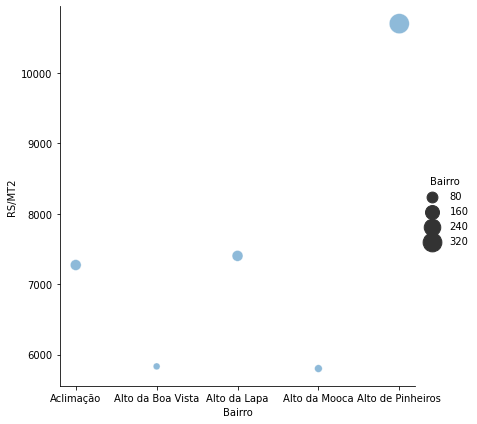

In [64]:
sns.relplot(x="Bairro", y="RS/MT2", size=sell_df['Bairro'].value_counts(),
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=avg_price_size_bairro.head(5))